# Transient OAAT CLM6 PPE

# 1. Setup

In [1]:
%load_ext watermark
%load_ext autoreload

import glob
import copy

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import cmocean.cm as cmo

import sys
sys.path.append('/glade/u/home/bbuchovecky/projects/cpl_ppe_co2/utils')
import cpl_ppe_co2 as ppe
%aimport cpl_ppe_co2
%autoreload 1

%watermark -iv -co -v

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

conda environment: cpl_ppe_co2

matplotlib: 3.9.1
pandas    : 2.2.2
cmocean   : 4.0.3
numpy     : 2.0.1
cartopy   : 0.24.1
sys       : 3.12.4 | packaged by conda-forge | (main, Jun 17 2024, 10:23:07) [GCC 12.3.0]
xarray    : 2024.6.0



## 1.1. Load ensemble

In [7]:
# Load parameter settings key
key = '/glade/campaign/cgd/tss/projects/PPE/ctsm6_oaat/ctsm6_oaat_key.csv'
df_key = pd.read_csv(key)

In [14]:
# Load postprocessed temporally averaged dataset 
in_file = '/glade/campaign/cgd/tss/projects/PPE/ctsm6_oaat/postp/ctsm6_oaat_postp_1985-2023.nc'
ds_avg = xr.open_dataset(in_file)

# Append key to ds
ds_avg = ds_avg.assign_coords(
    key=('ens', df_key['key'].values),
    param=('ens', df_key['param'].values),
    minmax=('ens', df_key['minmax'].values)
)
ds_avg = ds_avg.set_index(ens=["param", "minmax", "key"], append=True)

# Load postprocessed timeseries dataset
in_file = '/glade/campaign/cgd/tss/projects/PPE/ctsm6_oaat/postp/ctsm6_oaat_postp_timeseries_1901-2023.nc'
ds_tms = xr.open_dataset(in_file)

# Append key to ds
ds_tms = ds_tms.assign_coords(
    key=('ens', df_key['key'].values),
    param=('ens', df_key['param'].values),
    minmax=('ens', df_key['minmax'].values)
)
ds_tms = ds_tms.set_index(ens=["param", "minmax", "key"], append=True)

In [32]:
# Default CLM parameter set
default_avg = ds_avg.isel(ens=0)
default_tms = ds_tms.isel(ens=0)

# Calculate delta from default
ds_avg_delta = ds_avg - default_avg
ds_tms_delta = ds_tms - default_tms

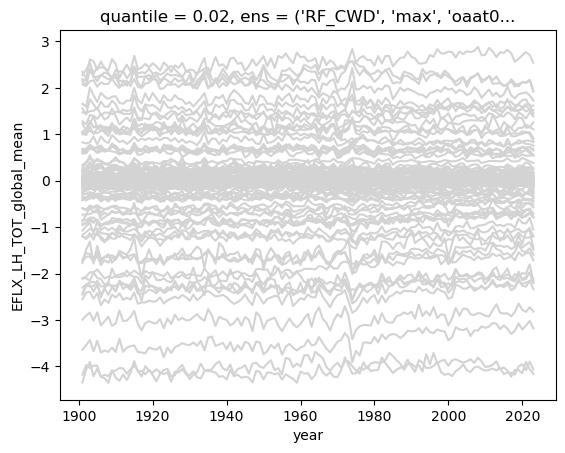

In [36]:
for e in ds_tms_delta.ens:
    ds_tms_delta['EFLX_LH_TOT_global_mean'].sel(ens=e).plot(color='lightgray')

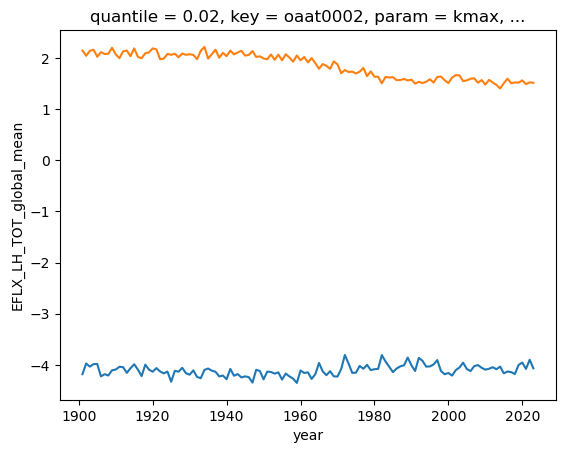

In [33]:
for mm in ['min', 'max']:
    ds_tms_delta['EFLX_LH_TOT_global_mean'].sel(param='kmax', minmax=mm).plot()

In [24]:
df_key.param.unique()

array(['default', 'kmax', 'psi50', 'jmaxb0', 'jmaxb1', 'wc2wjb0',
       'slatop', 'grperc', 'lmr_intercept_atkin', 'medlynslope',
       'medlynintercept', 'theta_cj', 'tpu25ratio', 'lmrse', 'vcmaxha',
       'jmaxha', 'tpuha', 'lmrha', 'froot_leaf', 'leafcn', 'leaf_long',
       'fstor2tran', 'crit_onset_gdd_sf', 'FUN_fracfixers', 'nfix_tmin',
       'nfix_topt', 'nfix_tmax', 'fff', 'e_ice', 'bsw_sf', 'sucsat_sf',
       'watsat_sf', 'hksat_sf', 'om_frac_sf', 'baseflow_scalar',
       'maximum_leaf_wetted_fraction', 'interception_fraction', 'cv',
       'd_max', 'dleaf', 'z0v_Cr', 'z0v_Cs', 'z0v_c', 'z0v_cw',
       'n_melt_coef', 'accum_factor', 'xdrdt',
       'upplim_destruct_metamorph', 'snw_rds_refrz', 'r_mort',
       'decomp_depth_efolding', 'q10_mr', 'minpsi_hr', 'maxpsi_hr',
       'pot_hmn_ign_counts_alpha', 'fsr_pft', 'xl', 'ACCLIM_SF', 'KCN',
       'TAU', 'RF_LS', 'RF_SS', 'RF_CWD'], dtype=object)